# <span style="color:skyblue">Gathering Data</span>
   - <span style="color:salmon">Import libraries</span> 


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas as pd
import numpy as np
import random
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from re import search
import shutil

from PIL import Image
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing import image


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

   - <span style="color:salmon">Define Path</span> 


In [3]:
# Define Path 
MAIN_PATH = os.getcwd()
IMAGE_DIR = 'C:\Dell\\cancer\\images'
# Image Size for Data Generator
IMG_SIZE = 224
# Batch Size
BATCH_SIZE = 16
# Epochs
EPOCHS = 50

In [4]:
df=pd.read_csv('train.csv')
img_path = r'C:\Dell\\cancer\\images'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           3642 non-null   object
 1   healthy            3642 non-null   int64 
 2   multiple_diseases  3642 non-null   int64 
 3   rust               3642 non-null   int64 
 4   scab               3642 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 142.4+ KB


In [6]:
df.shape

(3642, 5)

In [7]:
df.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [8]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [9]:
image=Image.open('images\Test_0.jpg')
image.show()

In [10]:
class_names=df.loc[:, 'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [11]:
number=0
df['label']=0
for i in class_names:
    df['label']=df['label'] + df[i] * number
    number= number+1

In [12]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [13]:
df.tail()

,image_id,healthy,multiple_diseases,rust,scab,label
3637,Test_1816,0,0,1,0,2
3638,Test_1817,0,0,0,1,3
3639,Test_1818,0,0,1,0,2
3640,Test_1819,1,0,0,0,0
3641,Test_1820,0,0,0,1,3


# <span style="color:skyblue">Feature Extraction</span>
   - <span style="color:salmon">Apply Hog</span> 

In [14]:
# Import skimage modules
from skimage import color
from skimage.feature import hog

# Function to extract HOG features
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    return features

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
hog_features = []

# Loop through the images in the DataFrame and compute the HOG features for each one
for img_id in tqdm(df['image_id']):
    # Check if the image file exists
    img_path = os.path.join(IMAGE_DIR, f"{img_id}.jpg")
    if os.path.exists(img_path):
        # Read the image
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        # Resize the image to the desired size
        image_resized = cv2.resize(image_rgb, (IMG_SIZE, IMG_SIZE))
        # Compute the HOG features and append them to the list
        hog_feature = extract_hog_features(image_resized)
        hog_features.append(hog_feature)

# Check if any HOG features were computed
if len(hog_features) == 0:
    print("No HOG features were computed. Check the code for issues in computing HOG features.")
else:
    # Convert the list of HOG features to a numpy array
    hog_features = np.array(hog_features)
    # Print the shape of the HOG features array
    print("HOG Features Shape:", hog_features.shape)

  0%|          | 0/3642 [00:00<?, ?it/s]

100%|██████████| 3642/3642 [05:13<00:00, 11.63it/s]


HOG Features Shape: (3642, 26244)



   - <span style="color:salmon">Data Balancing & Normalization</span> 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

# Normalize the HOG features
scaler = MinMaxScaler()
hog_features_normalized = scaler.fit_transform(hog_features)

# Data Balancing using SMOTE
smote = SMOTE()
hog_features_balanced, labels_balanced = smote.fit_resample(hog_features_normalized, df['label'])

# Shuffle the balanced data
hog_features_balanced, labels_balanced = shuffle(hog_features_balanced, labels_balanced)



# <span style="color:skyblue">Split Data</span>


In [17]:
df_train = df.iloc[0:1821 , :]
df_test = df.iloc[1821: , :]

In [18]:
df_train.head()


,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [19]:
df_train.tail()

,image_id,healthy,multiple_diseases,rust,scab,label
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2
1820,Train_1820,0,0,0,1,3


In [20]:
df_test.head()

,image_id,healthy,multiple_diseases,rust,scab,label
1821,Test_0,0,0,1,0,2
1822,Test_1,0,0,1,0,2
1823,Test_2,0,0,0,1,3
1824,Test_3,1,0,0,0,0
1825,Test_4,0,0,1,0,2


In [21]:
df_test.tail()

,image_id,healthy,multiple_diseases,rust,scab,label
3637,Test_1816,0,0,1,0,2
3638,Test_1817,0,0,0,1,3
3639,Test_1818,0,0,1,0,2
3640,Test_1819,1,0,0,0,0
3641,Test_1820,0,0,0,1,3


# <span style="color:skyblue">visualization</span>


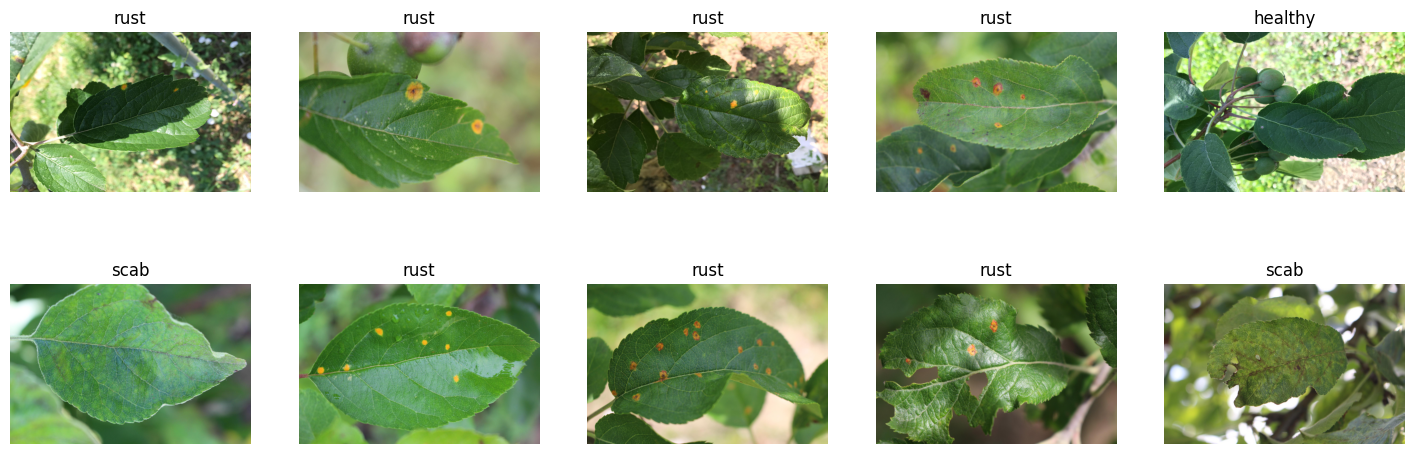

In [22]:
import random
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Check the number of images matching the pattern
image_pattern = os.path.join(IMAGE_DIR, "Train_*.jpg")
image_files = glob.glob(image_pattern)

# Specify the number of samples you want (e.g., 10)
num_samples = 10

# Check if there are enough images to sample
if len(image_files) >= num_samples:
    random_images = random.sample(image_files, num_samples)
    random_id = [img_path.split('\\')[-1] for img_path in random_images]
    
    def convert_dummies_to_category(df_train):
        data = df_train.copy()
        s2 = data[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)
        data = pd.concat([data, s2], axis=1)
        data.rename({0: 'category'}, axis=1, inplace=True)
        return data

    df_copy = convert_dummies_to_category(df)

    def get_category_img(img):
        ''' function to fetch the category of the image'''
        if search("Train", img):
            img = img.split('.')[0]
            category_series = df_copy.loc[df_copy['image_id'] == img, 'category']
            if not category_series.empty:
                return category_series.values[0]
        return None  # Return None if category is not found

else:
    print(f"Not enough images matching the pattern: {image_pattern}")

plt.figure(figsize=(18, 6))
for idx, img_path in enumerate(random_id):
    img_title = get_category_img(img_path)
    sp = plt.subplot(2, 5, idx+1)
    sp.axis('Off')
    complete_path = os.path.join(IMAGE_DIR, img_path)
    mp_image = mpimg.imread(complete_path)
    
    if img_title is not None:
        plt.title(img_title)
    else:
        plt.title("Category not found")
        
    plt.imshow(mp_image)

In [23]:
def get_label_img(img):
    ''' function to fetch the label of the image'''
    if search("Train",img):
        img=img.split('.')[0]
        label = df_train.loc[df_train['image_id']==img]['label']
        return label


In [25]:
# lets separate the images into separate folders according to their labels
def create_dir_image_labels():
    # sort the filenames in IMAGE_DIR using a custom key
    def natural_key (filename):
        # split the filename by underscore and dot
        parts = filename.split ('_') [1].split ('.')
        # return the second part as an integer
        return int (parts [0])
    images = sorted (os.listdir (IMAGE_DIR), key=natural_key)
    for img in tqdm(images):
        # function to fetch the label of the image
        label = get_label_img(img)
        # image path from the original image dir
        image_path = os.path.join(IMAGE_DIR,img)
        
        if search("Train",img):
            # if image label is equal to 0, copy that image into healthy directory.
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(image_path, os.path.join(MAIN_PATH,'train','healthy'))
             
            # if image label is equal to 1, copy that image into multiple_diseases directory.
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(image_path,os.path.join(MAIN_PATH,'train','multiple_diseases'))
               
            # if image label is equal to 2, copy that image into rust directory.
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(image_path,os.path.join(MAIN_PATH,'train','rust'))
             
            # if image label is equal to 3, copy that image into scab directory.
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(image_path,os.path.join(MAIN_PATH,'train','scab'))
         
        # else copy all excluded images from the above conditions into test directory.
        elif search("Test",img):
            shutil.copy(image_path,'test')

In [26]:
# create directory for train - healthy, multiple_diseases, rust, scab and test images
shutil.os.mkdir(os.path.join(MAIN_PATH, 'train'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','healthy'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','multiple_diseases'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','rust'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','scab'))

shutil.os.mkdir(os.path.join(MAIN_PATH, 'test'))

In [27]:
# Apply function to copy images belongs to their respective labels
create_dir_image_labels()

  1%|          | 37/3642 [00:00<00:09, 367.46it/s]

100%|██████████| 3642/3642 [00:08<00:00, 415.72it/s]


# <span style="color:skyblue">Model Building : Logistic Regression </span>

In [24]:


# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(hog_features_balanced, labels_balanced, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the HOG features
X_train_reshaped = x_train.reshape(x_train.shape[0], -1)
X_val_reshaped = x_val.reshape(x_val.shape[0], -1)
X_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_reshaped, y_train)

# Make predictions on the validation data
y_val_pred = log_reg.predict(X_val_reshaped)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Print the validation results
print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print("Validation Classification Report:")
print(val_class_report)

# Make predictions on the test data
y_test_pred = log_reg.predict(X_test_reshaped)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Print the test results
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)


Validation Accuracy: 0.6911764705882353
Validation Confusion Matrix:
[[112   1  13  19]
 [  3 122   3   2]
 [ 26   2  65  48]
 [  9   3  39  77]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       145
           1       0.95      0.94      0.95       130
           2       0.54      0.46      0.50       141
           3       0.53      0.60      0.56       128

    accuracy                           0.69       544
   macro avg       0.69      0.69      0.69       544
weighted avg       0.69      0.69      0.69       544

Test Accuracy: 0.6935779816513762
Test Confusion Matrix:
[[ 94   1  22  19]
 [  1 138   0   1]
 [ 28   4  60  38]
 [ 18   0  35  86]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       136
           1       0.97      0.99      0.98       140
           2       0.51      0.46      0.49       130
      

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# <span style="color:skyblue">Model Building : Cross Validation </span>

In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores = cross_val_score(log_reg, X_train_reshaped, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Cross-Validation Scores: [0.6532721  0.67623421 0.68197474 0.67967853 0.66819747]
Mean Cross-Validation Score: 0.6718714121699196


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# <span style="color:skyblue">Model Building : Grid Search </span>

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(hog_features_balanced, labels_balanced, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the HOG features
X_train_reshaped = x_train.reshape(x_train.shape[0], -1)
X_val_reshaped = x_val.reshape(x_val.shape[0], -1)
X_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train_reshaped)
x_val_scaled = scaler.transform(X_val_reshaped)
x_test_scaled = scaler.transform(X_test_reshaped)

# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.01],
    'penalty': ['l1', 'l2']
}

# Create a logistic regression model
log_reg = LogisticRegression()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=10)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_log_reg_model = grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_val_pred = best_log_reg_model.predict(x_val_scaled)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Print the validation results
print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print("Validation Classification Report:")
print(val_class_report)

# Make predictions on the test data using the best model
y_test_pred = best_log_reg_model.predict(x_test_scaled)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Print the test results
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Validation Accuracy: 0.7205882352941176
Validation Confusion Matrix:
[[117   0  14  14]
 [  0 127   2   1]
 [ 29   1  69  42]
 [  9   2  38  79]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       145
           1       0.98      0.98      0.98       130
           2       0.56      0.49      0.52       141
           3       0.58      0.62      0.60       128

    accuracy                           0.72       544
   macro avg       0.72      0.72      0.72       544
weighted avg       0.72      0.72      0.72       544

Test Accuracy: 0.7119266055045872
Test Confusion Matrix:
[[ 96   0  21  19]
 [  0 140   0   0]
 [ 30   2  67  31]
 [ 19   1  34  85]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       136
           1       0.98      1.00      0.99       140
         

In [27]:


# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.01], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

# <span style="color:skyblue">Model Building : Logistic Regression with Grid Search </span>

In [28]:
# Create a logistic regression model with the best hyperparameters
log_reg = LogisticRegression(**best_params)

# Fit the model on the scaled training data
log_reg.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = log_reg.predict(x_test_scaled)

# Evaluate the model with scaled features
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
class_report_scaled = classification_report(y_test, y_pred_scaled)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy with Scaled Features:", accuracy_scaled)
print("Confusion Matrix with Scaled Features:")
print(conf_matrix_scaled)
print("Classification Report with Scaled Features:")
print(class_report_scaled)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy with Scaled Features: 0.7119266055045872
Confusion Matrix with Scaled Features:
[[ 96   0  21  19]
 [  0 140   0   0]
 [ 30   2  67  31]
 [ 19   1  34  85]]
Classification Report with Scaled Features:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       136
           1       0.98      1.00      0.99       140
           2       0.55      0.52      0.53       130
           3       0.63      0.61      0.62       139

    accuracy                           0.71       545
   macro avg       0.70      0.71      0.71       545
weighted avg       0.71      0.71      0.71       545



c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# <span style="color:skyblue">Model Building : Accuracy</span>

In [29]:
# Print the accuracy for the training, validation, and test sets
print("Training Accuracy:", accuracy_score(y_train, best_log_reg_model.predict(x_train_scaled)))
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", accuracy_score(y_test, best_log_reg_model.predict(x_test_scaled)))


Training Accuracy: 0.9997703788748565
Validation Accuracy: 0.7205882352941176
Test Accuracy: 0.7119266055045872


# <span style="color:skyblue">Logistic Regression with ROC </span>

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

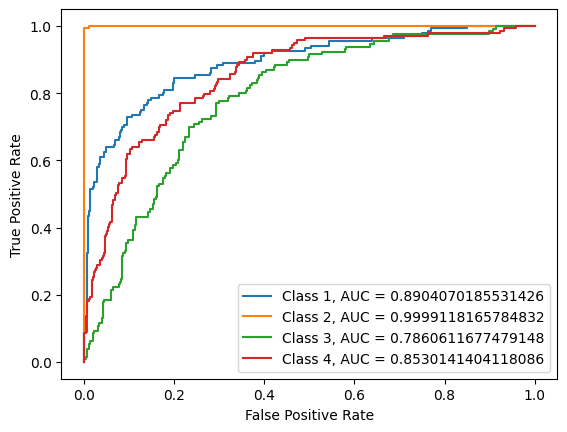

In [30]:
# Import necessary modules
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Binarize the target variable for multiclass ROC-AUC
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Create a logistic regression model
log_reg = LogisticRegression(**best_params)

# Create a one-vs-rest classifier
ovr_clf = OneVsRestClassifier(log_reg)

# Fit the model on the scaled training data
ovr_clf.fit(x_train_scaled, y_train_bin)

# Get the predicted probabilities for each class
y_pred_proba = ovr_clf.predict_proba(x_test_scaled)

# Plot the ROC-AUC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i + 1}, AUC = {auc}")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [31]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
 
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test_bin, y_pred_proba)
 
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.88


# <span style="color:skyblue">Model Building : Kmeans with loss curve</span>

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

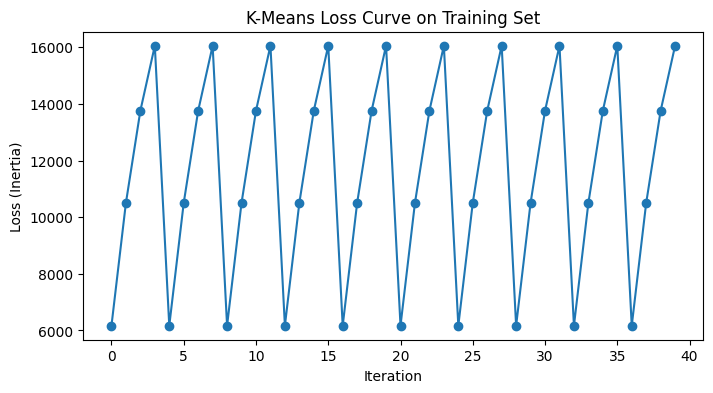

Best Hyperparameters: Init=k-means++, MaxIter=200, PCAComp=2
Best Silhouette Score on Training Set: 0.3820


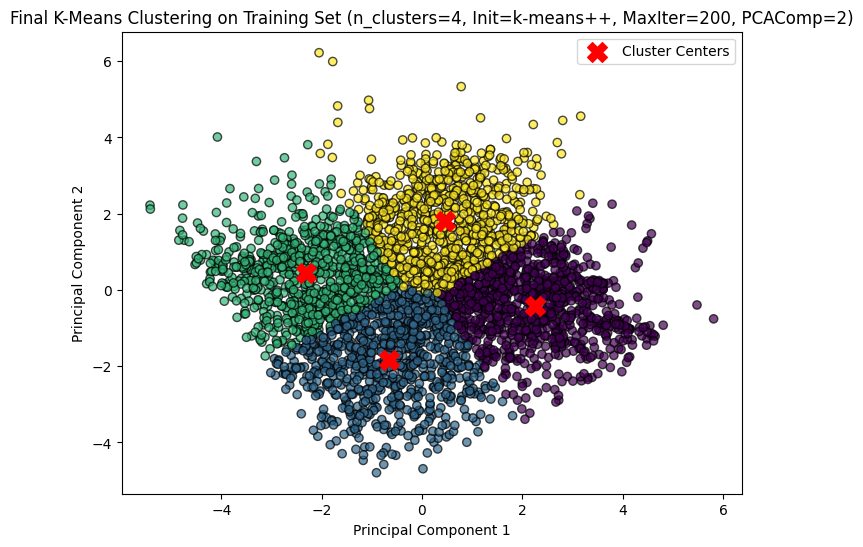

Accuracy on Test Set: 0.2044
Confusion Matrix on Test Set:
 [[ 60  54  41  44]
 [ 43  27  40 127]
 [ 51  52  58  44]
 [ 60  61  76  33]]
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.28      0.30      0.29       199
           1       0.14      0.11      0.13       237
           2       0.27      0.28      0.28       205
           3       0.13      0.14      0.14       230

    accuracy                           0.20       871
   macro avg       0.21      0.21      0.21       871
weighted avg       0.20      0.20      0.20       871



c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

Accuracy on Validation Set: 0.3199
Confusion Matrix on Validation Set:
 [[46 32 35 32]
 [26 59 21 24]
 [37 33 34 37]
 [37 30 26 35]]
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.32      0.32      0.32       145
           1       0.38      0.45      0.42       130
           2       0.29      0.24      0.26       141
           3       0.27      0.27      0.27       128

    accuracy                           0.32       544
   macro avg       0.32      0.32      0.32       544
weighted avg       0.32      0.32      0.32       544

Homogeneity Score on Validation Set: 0.0169
Completeness Score on Validation Set: 0.0170
V-Measure Score on Validation Set: 0.0169


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assuming X_train_reshaped is your original dataset and y_train are the labels
# Reshape y_train to match the number of samples in X_train_reshaped
y_train = y_train[:X_train_reshaped.shape[0]]

# Ensure that y_train has the correct shape
y_train = np.array(y_train).ravel()

# Now, you can proceed with the train_test_split and other operations
X_train, X_test, y_train, y_test = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42)

# Feature Selection
# Assuming X_train is your original dataset
# Select the top k features using ANOVA F-statistic
k_best_selector = SelectKBest(f_classif, k=10) # You can adjust 'k' based on your dataset
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Feature Scaling and Normalization
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Non-linear Transformations using Power Transformation
power_transformer = PowerTransformer(method='yeo-johnson')
X_train_transformed = power_transformer.fit_transform(X_train_selected_scaled)
X_test_transformed = power_transformer.transform(X_test_selected_scaled)

# PCA with 3 components (adjust if needed)
pca = PCA(n_components=3)
X_pca_train = pca.fit_transform(X_train_transformed) # Use scaled and transformed data for PCA
X_pca_test = pca.transform(X_test_transformed)

# Hyperparameter tuning with silhouette scores and loss capture
best_params = None
best_labels_train = None
best_centers_train = None
best_silhouette_score_train = -1
loss_curve_train = []

for init_method in ['k-means++', 'random']:
    for max_iter_value in [50, 100, 200, 300, 500]:
        for n_components in [2, 3, 4, 5]:
            pca = PCA(n_components=n_components)
            X_pca_transformed = pca.fit_transform(X_train_transformed)

            kmeans = KMeans(n_clusters=4, init=init_method, max_iter=max_iter_value, random_state=42)
            labels = kmeans.fit_predict(X_pca_transformed)
            
            # Capture the loss (inertia_) at each iteration
            loss_curve_train.append(kmeans.inertia_)

            silhouette_avg = silhouette_score(X_pca_transformed, labels)

            if silhouette_avg > best_silhouette_score_train:
                best_params = f'Init={init_method}, MaxIter={max_iter_value}, PCAComp={n_components}'
                best_labels_train = labels
                best_centers_train = kmeans.cluster_centers_
                best_silhouette_score_train = silhouette_avg

# Plot the loss curve
plt.figure(figsize=(8, 4))
plt.plot(loss_curve_train, marker='o')
plt.title('K-Means Loss Curve on Training Set')
plt.xlabel('Iteration')
plt.ylabel('Loss (Inertia)')
plt.show()

# Apply the best KMeans model to the test set
labels_test = kmeans.predict(pca.transform(power_transformer.transform(scaler.transform(k_best_selector.transform(X_test)))))

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, labels_test)
confusion_matrix_test = confusion_matrix(y_test, labels_test)
classification_report_test = classification_report(y_test, labels_test)

# Print the best hyperparameters and scores on the training set
print(f"Best Hyperparameters: {best_params}")
print(f"Best Silhouette Score on Training Set: {best_silhouette_score_train:.4f}")

# Visualize the final clustering results on the training set in 2D (adjust for higher dimensions if needed)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=best_labels_train, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(best_centers_train[:, 0], best_centers_train[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title(f'Final K-Means Clustering on Training Set (n_clusters=4, {best_params})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print evaluation metrics on the test set
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print("Confusion Matrix on Test Set:\n", confusion_matrix_test)
print("Classification Report on Test Set:\n", classification_report_test)

# Cross-validation on X_val and y_val
labels_val = cross_val_predict(
    KMeans(n_clusters=4, init=best_params.split(',')[0].split('=')[1],
           max_iter=int(best_params.split(',')[1].split('=')[1]), random_state=42),
    pca.transform(power_transformer.transform(scaler.transform(k_best_selector.transform(x_val)))),
    cv=5  # You can adjust the number of folds
)

# Evaluate the performance on the validation set
accuracy_val = accuracy_score(y_val, labels_val)
confusion_matrix_val = confusion_matrix(y_val, labels_val)
classification_report_val = classification_report(y_val, labels_val)

# Print evaluation metrics on the validation set
print(f"Accuracy on Validation Set: {accuracy_val:.4f}")
print("Confusion Matrix on Validation Set:\n", confusion_matrix_val)
print("Classification Report on Validation Set:\n", classification_report_val)

# Additional evaluation metrics and curves
homogeneity_val = homogeneity_score(y_val, labels_val)
completeness_val = completeness_score(y_val, labels_val)
v_measure_val = v_measure_score(y_val, labels_val)

print(f"Homogeneity Score on Validation Set: {homogeneity_val:.4f}")
print(f"Completeness Score on Validation Set: {completeness_val:.4f}")
print(f"V-Measure Score on Validation Set: {v_measure_val:.4f}")

# <span style="color:skyblue"> Logistic Regression with loss curve</span>

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


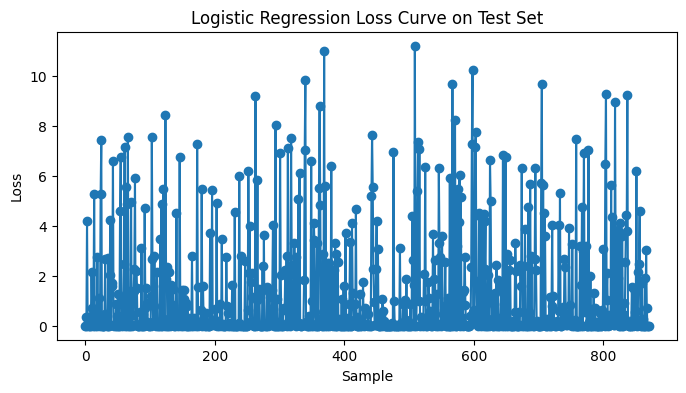

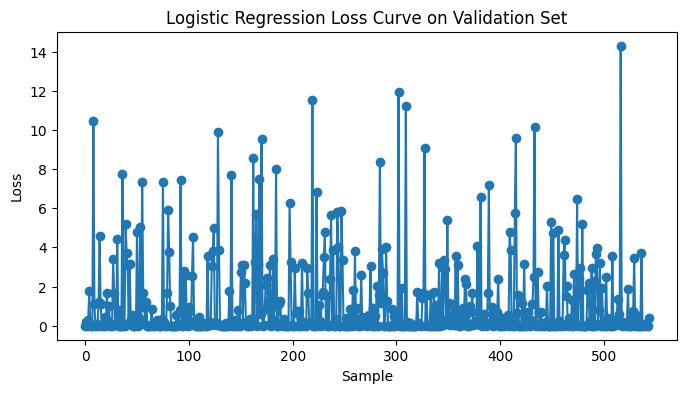

In [36]:
from sklearn.model_selection import train_test_split



# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
loss_test = model.predict_proba(X_test)
loss_curve_test = -1 * np.log(loss_test[np.arange(len(loss_test)), y_test])

# Evaluate the model on the validation set
loss_val = model.predict_proba(X_val_reshaped)
loss_curve_val = -1 * np.log(loss_val[np.arange(len(loss_val)), y_val])

# Plot the loss curve for the test set
plt.figure(figsize=(8, 4))
plt.plot(loss_curve_test, marker='o')
plt.title('Logistic Regression Loss Curve on Test Set')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.show()

# Plot the loss curve for the validation set
plt.figure(figsize=(8, 4))
plt.plot(loss_curve_val, marker='o')
plt.title('Logistic Regression Loss Curve on Validation Set')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.show()